In [110]:
%config InlineBackend.figure_format = 'retina'

In [111]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

from connection import execute_query as eq


In [112]:
sql_file_path = os.path.abspath("deliris.sql")

with open(sql_file_path, "r", encoding="utf-8") as file:
    query = file.read()
df = eq(query)

Executing query...
Query executada correctament en 1.00 segons


In [113]:
icu_counts = df['ou_loc_ref'].value_counts().reset_index()
icu_counts.columns = ['ICU', 'Count']


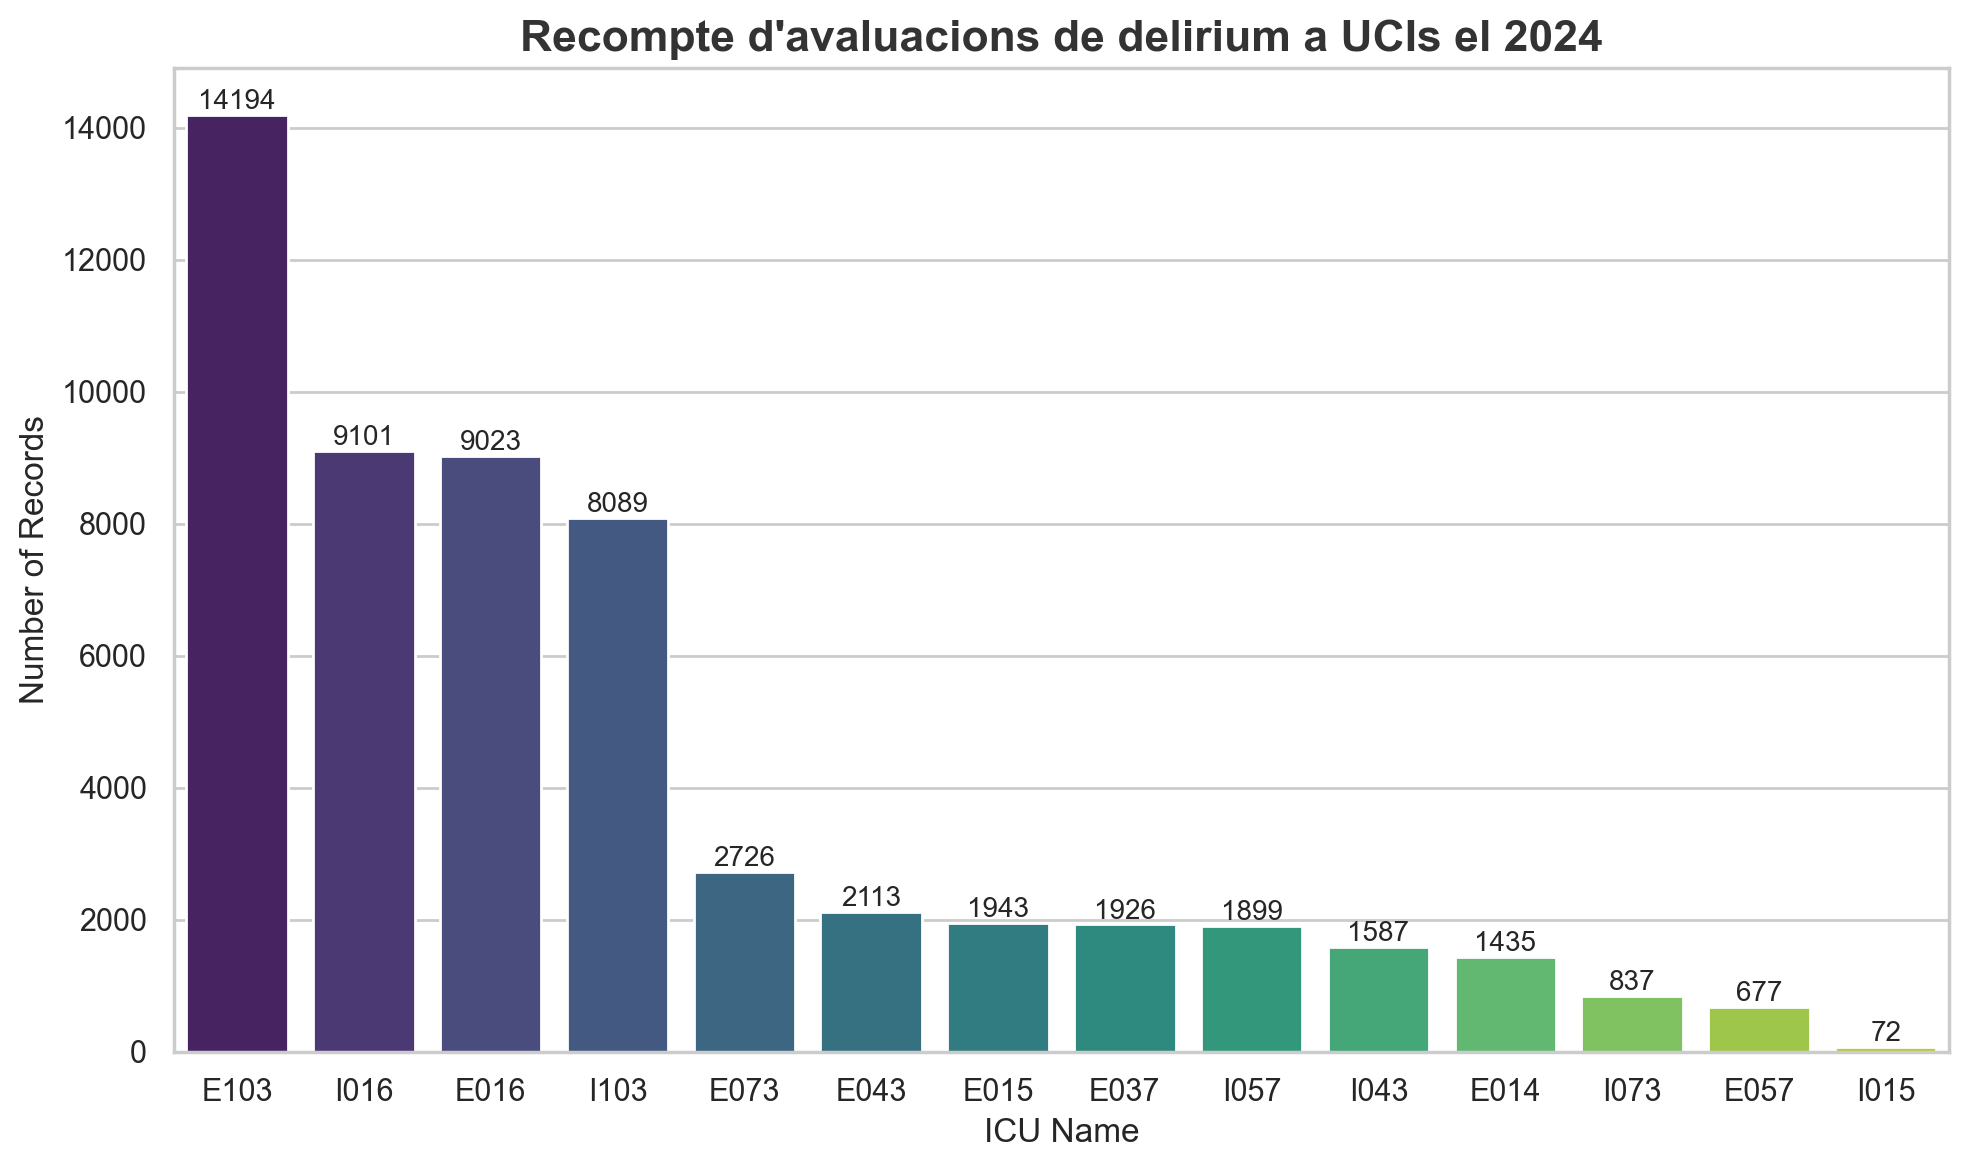

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

sns.barplot(
    data=icu_counts,
    x="ICU",
    y="Count",
    hue="ICU",
    dodge=False,
    legend=False,
    palette="viridis"
)

plt.title("Recompte d'avaluacions de delirium a UCIs el 2024", fontsize=16, fontweight='bold', color='#333')
plt.xlabel("ICU Name", fontsize=12)
plt.ylabel("Number of Records", fontsize=12)

for index, row in icu_counts.iterrows():
    plt.text(index, row['Count'] + 1, row['Count'], ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [115]:
df_hep = df[(df['ou_loc_ref'] == 'E073') | (df['ou_loc_ref'] == 'I073')]
df_distr_delirium = df_hep['result_txt'].value_counts().reset_index()
df_distr_delirium.columns = ['Delirium', 'Count']
delirium_mapping = {'DELIRIO_CAM-ICU_1': 'No Delirium', 'DELIRIO_CAM-ICU_2': 'Delirium', 'DELIRIO_CAM-ICU_3': 'Others'}
delirium_labels = [delirium_mapping.get(x, x) for x in df_distr_delirium['Delirium']]
df_distr_delirium['Delirium'] = delirium_labels
proportions = df_distr_delirium['Count'] / df_distr_delirium['Count'].sum() * 100
df_distr_delirium['Proportion (%)'] = proportions.round(2)
df_distr_delirium.head()
print("The proportion of delirium cases in Liver ICU (among those who are evaluated) is: {:.2f}%".format(
    df_distr_delirium.loc[df_distr_delirium['Delirium'] == 'Delirium', 'Proportion (%)'].values[0]
))

The proportion of delirium cases in Liver ICU (among those who are evaluated) is: 86.98%
